<a href="https://colab.research.google.com/github/dinhtiendat2k3/bai-tap/blob/main/Bu%E1%BB%95i_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
from math import pi
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('/content/Salaries.csv')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [23]:
def create_spider_chart(df, group_col, categories_col, value_col, title):
    # Tính giá trị trung bình của lương theo nhóm và discipline
    grouped_data = df.groupby([group_col, categories_col])[value_col].mean().unstack()
    categories = list(grouped_data.columns)
    groups = list(grouped_data.index)

    # Số lượng categories
    N = len(categories)

    # Góc của mỗi category trên biểu đồ
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Vẽ mỗi nhóm
    for group in groups:
        values = grouped_data.loc[group].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=group)
        ax.fill(angles, values, alpha=0.1)

    # Thêm các labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.title(title, size=15, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()


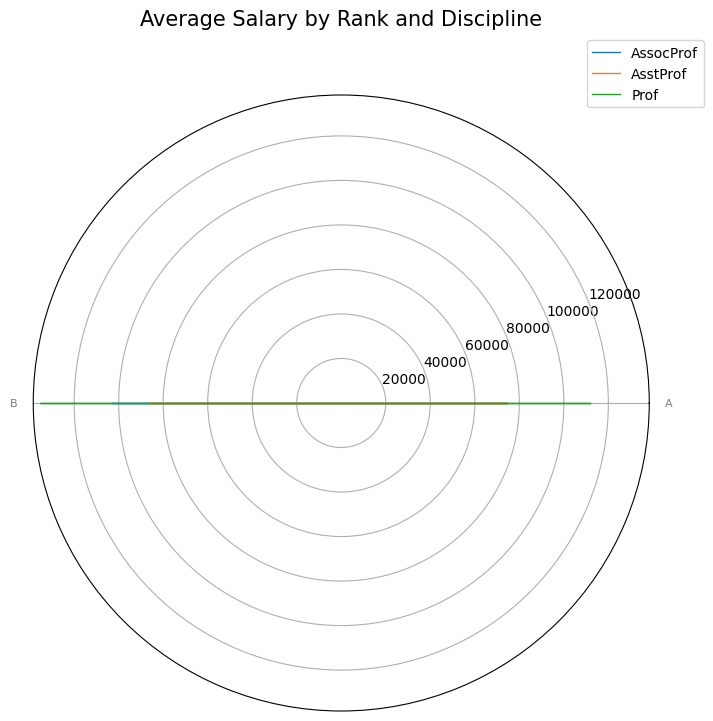

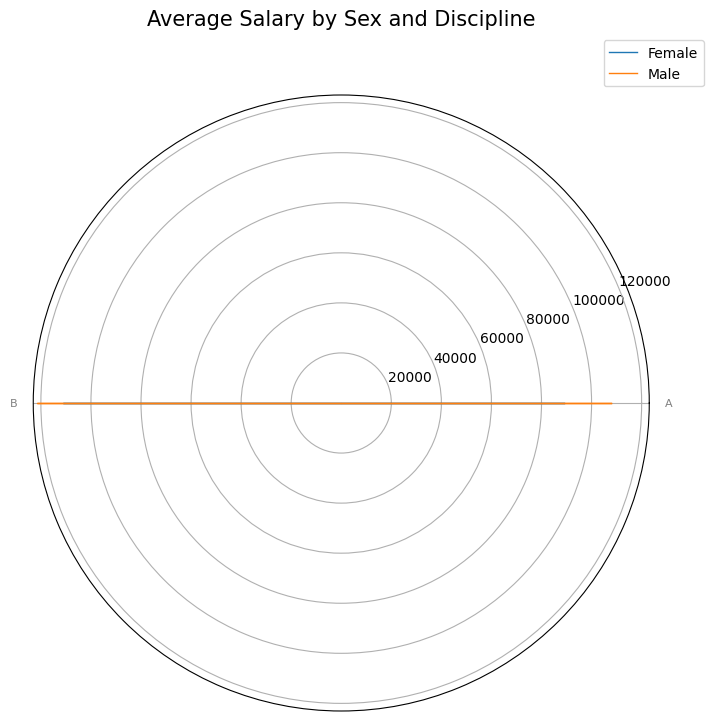

In [24]:

salaries = pd.DataFrame(data)

# Vẽ biểu đồ spider cho các nhóm rank
create_spider_chart(salaries, 'rank', 'discipline', 'salary', 'Average Salary by Rank and Discipline')

# Vẽ biểu đồ spider cho các nhóm sex
create_spider_chart(salaries, 'sex', 'discipline', 'salary', 'Average Salary by Sex and Discipline')